In [1]:

import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
rev = pd.read_csv('reviews.TSV', sep='\t')

for x in rev.index:
     if rev.loc[x, "label"] =='Mixed':
         rev.drop(x, inplace = True)


rev.to_excel('reviwes.xlsx')


rev = pd.read_excel('reviwes.xlsx' , usecols=['label','text'])

for x1 in rev.index:
   if rev.loc[x1 , 'label'] == 'Positive':
    rev.loc[x1 , 'label'] = 1
        
        
for x1 in rev.index:
   if rev.loc[x1 , 'label'] == 'Negative':
       rev.loc[x1 , 'label'] = 0
        
rev = rev.sample(frac=1).reset_index(drop=True)
        
rev.to_excel('trining.xlsx')


In [2]:
train  = pd.read_excel('training.xlsx')

test = pd.read_excel('testing.xlsx')

combi = train.append(test, ignore_index=True)

In [3]:
# To count The word for each text 
combi["word_count"] = combi['text'].apply(lambda x : len(str(x).split(' ')))
combi[['text','word_count']].head()

# to count the caharctaer for each in text 
combi["char_count"] = combi['text'].str.len()
combi[['text','char_count']].head()

,text,char_count
0,الغلاف لوحده يستحق نجوم : . رواية بسيطة وسلسة ...,323.0
1,وبعد جهد جهيد..,15.0
2,ضعيف. . استقبال سئ جدا جدا وخاصة موظفة جانيت غ...,141.0
3,ممتاز. الموقع والهدوء والخصوصية وحسن المعاملة ...,63.0
4,كتبت عن هذا الكتاب الرائع على المدونة على هذا ...,72.0


In [4]:
combi['num_digit'] =  combi['text'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()])) 
combi[['text','num_digit']].head()


,text,num_digit
0,الغلاف لوحده يستحق نجوم : . رواية بسيطة وسلسة ...,0
1,وبعد جهد جهيد..,0
2,ضعيف. . استقبال سئ جدا جدا وخاصة موظفة جانيت غ...,0
3,ممتاز. الموقع والهدوء والخصوصية وحسن المعاملة ...,0
4,كتبت عن هذا الكتاب الرائع على المدونة على هذا ...,0


In [5]:
for x1 in combi.index:
    if combi.loc[x1 , 'text'] ==0:
        combi.drop(x1 , inplace=True)

In [6]:
del combi['num_digit']

In [7]:
# to count The avg word of each text  
def avg_word(sen):
    words = str(sen).split()
    return (sum(len(x) for x in words)/len(words))


In [8]:
combi["Avg_word"] = combi['text'].apply(lambda x : avg_word(x))
combi[['text','Avg_word']].head()

,text,Avg_word
0,الغلاف لوحده يستحق نجوم : . رواية بسيطة وسلسة ...,4.225806
1,وبعد جهد جهيد..,4.333333
2,ضعيف. . استقبال سئ جدا جدا وخاصة موظفة جانيت غ...,4.259259
3,ممتاز. الموقع والهدوء والخصوصية وحسن المعاملة ...,6.111111
4,كتبت عن هذا الكتاب الرائع على المدونة على هذا ...,3.294118


In [9]:
# number of stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('arabic')

combi['num_stopword'] = combi['text'].apply(lambda x : len([x for x in str(x).split() if x in stop]))
combi[['text','num_stopword']].head()

,text,num_stopword
0,الغلاف لوحده يستحق نجوم : . رواية بسيطة وسلسة ...,6
1,وبعد جهد جهيد..,0
2,ضعيف. . استقبال سئ جدا جدا وخاصة موظفة جانيت غ...,3
3,ممتاز. الموقع والهدوء والخصوصية وحسن المعاملة ...,1
4,كتبت عن هذا الكتاب الرائع على المدونة على هذا ...,5


In [10]:

#
#               pre- processing part
#



# Remove punctuation 
combi['text'] = combi['text'].str.replace('[^\w\s]','')
combi['text'].head()

<ipython-input-10-0ecd325875cb>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['text'] = combi['text'].str.replace('[^\w\s]','')


0    الغلاف لوحده يستحق نجوم   رواية بسيطة وسلسة  ق...
1                                        وبعد جهد جهيد
2    ضعيف  استقبال سئ جدا جدا وخاصة موظفة جانيت غير...
3    ممتاز الموقع والهدوء والخصوصية وحسن المعاملة م...
4    كتبت عن هذا الكتاب الرائع على المدونة على هذا ...
Name: text, dtype: object

In [11]:
# Removing stopords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('arabic')
combi['text'] = combi['text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
combi['text'].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emhad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    الغلاف لوحده يستحق نجوم رواية بسيطة وسلسة قصة ...
1                                        وبعد جهد جهيد
2    ضعيف استقبال سئ جدا جدا وخاصة موظفة جانيت محتر...
3    ممتاز الموقع والهدوء والخصوصية وحسن المعاملة ا...
4                    كتبت الكتاب الرائع المدونة الرابط
Name: text, dtype: object

In [12]:
# Remove coomon word 

freq = pd.Series(' '.join(combi['text']).split()).value_counts()[:3]

freq = list(freq.index)
combi['text'] = combi['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
combi['text'].head()


0    الغلاف لوحده يستحق نجوم رواية بسيطة وسلسة قصة ...
1                                        وبعد جهد جهيد
2    ضعيف استقبال سئ وخاصة موظفة جانيت محترمه تتكلم...
3    ممتاز الموقع والهدوء والخصوصية وحسن المعاملة ا...
4                    كتبت الكتاب الرائع المدونة الرابط
Name: text, dtype: object

In [13]:
# Remove rare word 

rare = pd.Series(' '.join(combi['text']).split()).value_counts()[-20:]

rare = list(rare.index)
combi['text'] = combi['text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))
combi['text'].head()

0    الغلاف لوحده يستحق نجوم رواية بسيطة وسلسة قصة ...
1                                        وبعد جهد جهيد
2    ضعيف استقبال سئ وخاصة موظفة جانيت محترمه تتكلم...
3    ممتاز الموقع والهدوء والخصوصية وحسن المعاملة ا...
4                    كتبت الكتاب الرائع المدونة الرابط
Name: text, dtype: object

In [14]:

# n-grams
from textblob import TextBlob

TextBlob(combi['text'][0]).ngrams(2)

[WordList(['الغلاف', 'لوحده']),
 WordList(['لوحده', 'يستحق']),
 WordList(['يستحق', 'نجوم']),
 WordList(['نجوم', 'رواية']),
 WordList(['رواية', 'بسيطة']),
 WordList(['بسيطة', 'وسلسة']),
 WordList(['وسلسة', 'قصة']),
 WordList(['قصة', 'حب']),
 WordList(['حب', 'جميلة']),
 WordList(['جميلة', 'وانسان']),
 WordList(['وانسان', 'يتغير']),
 WordList(['يتغير', 'درجة']),
 WordList(['درجة', 'بسبب']),
 WordList(['بسبب', 'الحب']),
 WordList(['الحب', 'مغامرات']),
 WordList(['مغامرات', 'أحراش']),
 WordList(['أحراش', 'أفريقيا']),
 WordList(['أفريقيا', 'وغاباتها']),
 WordList(['وغاباتها', 'الصراع']),
 WordList(['الصراع', 'الداخلي']),
 WordList(['الداخلي', 'عاشه']),
 WordList(['عاشه', 'بطل']),
 WordList(['بطل', 'الرواية']),
 WordList(['الرواية', 'وتحوله']),
 WordList(['وتحوله', 'تماما']),
 WordList(['تماما', 'شخص']),
 WordList(['شخص', 'لشخص']),
 WordList(['لشخص', 'آخر']),
 WordList(['آخر', 'يستحق']),
 WordList(['يستحق', 'التمهل']),
 WordList(['التمهل', 'قليلا']),
 WordList(['قليلا', 'كان']),
 WordList(['ك

In [15]:

#    _________________________________________________________________________
#   |                                                                         |
#   |                                                                         |         
#   |                         Text Visualization                              |
#   |_________________________________________________________________________|




import pandas as pd
from wordcloud import WordCloud
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt 


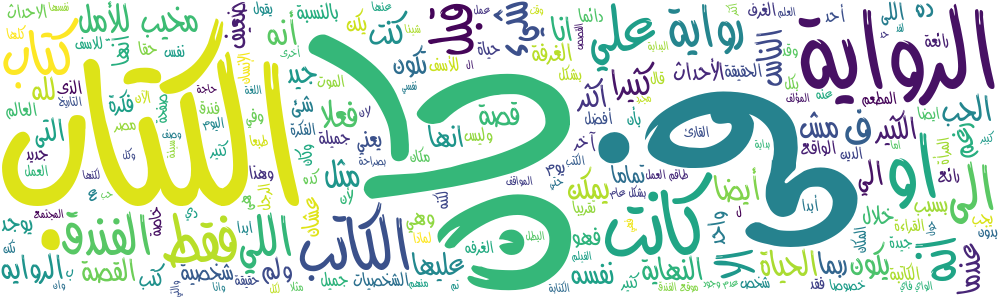

In [16]:
all_words = ' '.join([text for text in combi['text']])
reshaped_text = arabic_reshaper.reshape(all_words)
arabic_text = get_display(reshaped_text)
wordcloud = WordCloud(font_path='Motken Unicode Hor.ttf',width=1000, height=300, background_color="white" ).generate(arabic_text)
wordcloud.to_image()

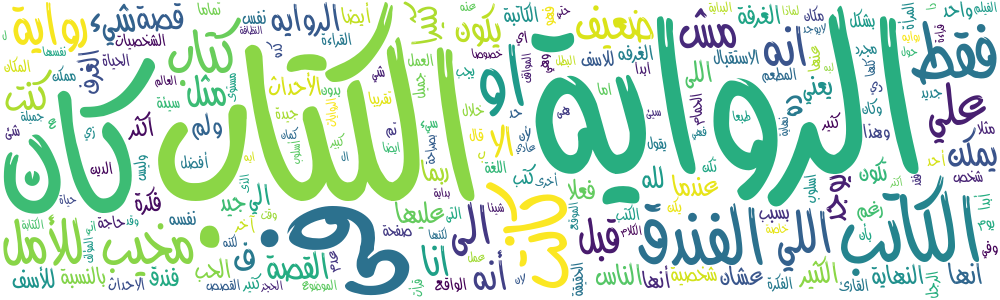

In [17]:
Negative_words = ' '.join([text for text in combi['text'][combi['label']==0]])
reshaped_text = arabic_reshaper.reshape(Negative_words)
arabic_text = get_display(reshaped_text)
wordcloud = WordCloud(font_path='Motken Unicode Hor.ttf',width=1000, height=300, background_color="white" ).generate(arabic_text)
wordcloud.to_image()

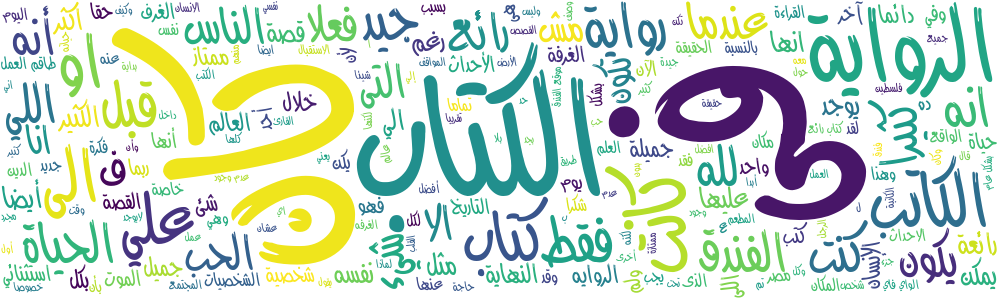

In [18]:
Positive_words = ' '.join([text for text in combi['text'][combi['label']==1]])
reshaped_text = arabic_reshaper.reshape(Positive_words)
arabic_text = get_display(reshaped_text)
wordcloud = WordCloud(font_path='Motken Unicode Hor.ttf',width=1000, height=300, background_color="white" ).generate(arabic_text)
wordcloud.to_image()


In [19]:
#________________________________________________________________________________
#                               Feature Extraction
#________________________________________________________________________________

# The astype(‘U’) is telling numpy to convert the data to Unicode 
# essentially a string in python)

#                                Bag of Word 
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, ngram_range=(1,1),analyzer = "word")
bow = bow.fit_transform(combi['text'].values.astype('U'))


In [20]:
#                                  TF/IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['text'].values.astype('U'))

In [21]:

#                     |||     LogisticRegression   |||
#________________________________________________________________________________
#                    Building model using Bag-of-Words features
#________________________________________________________________________________


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score


train_bow = bow[:46664,:]
test_bow = bow[46664:,:]

# splitting data into combiing and validation set
t_txt_bow, v_txt_bow, t_labl_bow, v_labl_bow = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)


In [22]:
lreg = LogisticRegression()
lreg.fit(t_txt_bow, t_labl_bow)


LogisticRegression()

In [23]:
prediction = lreg.predict_proba(v_txt_bow)
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)


f1_score(v_labl_bow, prediction_int) #

0.659033572676111

In [25]:
   #                |||     LogisticRegression   |||
#________________________________________________________________________________
#                    Building model using TF-IDF features
#________________________________________________________________________________


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score


train_tfidf = tfidf[:46664,:]
test_tfidf = tfidf[46664:,:]

# splitting data into combiing and validation set
t_txt_tfidf, v_txt_tfidf, t_labl_tfidf, v_labl_tfidf = train_test_split(train_tfidf, train['label'], random_state=42, test_size=0.3)


In [26]:
lreg = LogisticRegression()
lreg.fit(t_txt_tfidf, t_labl_tfidf)


LogisticRegression()

In [27]:
prediction = lreg.predict_proba(v_txt_tfidf)
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)


f1_score(v_labl_tfidf, prediction_int) # calculating f1 score


0.6630262968817359